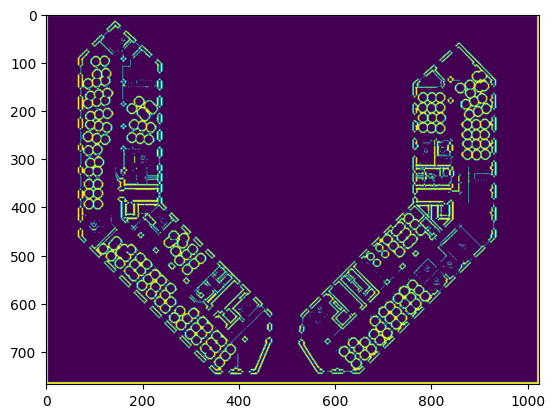

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Read image.
import os
import sys
#to get the current working directory
dir_name = os.getcwd()
base_filename='background'
suffix = '.png'
path=os.path.join(dir_name, base_filename + suffix)


img = cv2.imread(path)
blur_hor = cv2.filter2D(img[:, :, 0], cv2.CV_32F, kernel=np.ones((11,1,1), np.float32)/11.0, borderType=cv2.BORDER_CONSTANT)
blur_vert = cv2.filter2D(img[:, :, 0], cv2.CV_32F, kernel=np.ones((1,11,1), np.float32)/11.0, borderType=cv2.BORDER_CONSTANT)
mask = ((img[:,:,0]>blur_hor*1.2) | (img[:,:,0]>blur_vert*1.2)).astype(np.uint8)*255
plt.imshow(mask)

In [ ]:
'''
The most important parameters for your HoughCircles call are:
param1: because you are using cv2.HOUGH_GRADIENT, param1 is the higher threshold for the edge detection algorithm and param1 / 2 is the lower threshold.
param2: it represents the accumulator threshold, so the lower the value, the more circles will be returned.
minRadius and maxRadius: the blue circles in the example have a diameter of roughly 20 pixels, so using 70 pixels for maxRadius is the reason why so many circles are being returned by the algorithm.
minDist: the minimum distance between the centers of two circles.
The parameterization defined below:
'''

In [8]:
circles = cv2.HoughCircles(mask,
                           cv2.HOUGH_GRADIENT,
                           minDist=8,
                           dp=1,
                           param1=150,
                           param2=12,
                           minRadius=4,
                           maxRadius=10)
output = img.copy()
count = 0
for (x, y, r) in circles[0, :, :]:
    print(x,y,r)      
    cv2.circle(output, (int(x), int(y)), int(r), (0, 255, 0), 1)
    count += 1
# show the output image
print('Number of Seats: {}'.format(count))
cv2.imshow("output", np.hstack([output]))
# cv2.imwrite('output.jpg',np.hstack([output]),[cv2.IMWRITE_JPEG_QUALITY, 70])
cv2.waitKey(0)

618.5 699.5 8.2
235.5 596.5 8.2
631.5 711.5 8.2
720.5 480.5 8.2
92.5 209.5 9.4
760.5 561.5 8.2
106.5 122.5 9.4
321.5 506.5 8.2
675.5 694.5 8.2
680.5 663.5 8.2
694.5 648.5 8.2
818.5 193.5 8.2
86.5 185.5 8.2
109.5 306.5 8.2
637.5 681.5 8.2
781.5 193.5 8.2
86.5 253.5 8.2
88.5 393.5 8.2
107.5 371.5 8.2
127.5 163.5 8.2
682.5 636.5 8.2
752.5 423.5 8.2
874.5 249.5 8.2
108.5 394.5 9.4
88.5 352.5 8.2
107.5 352.5 8.2
818.5 172.5 8.2
914.5 195.5 8.2
89.5 228.5 9.4
122.5 96.5 9.4
264.5 457.5 9.4
88.5 372.5 8.2
239.5 552.5 8.2
292.5 530.5 8.2
306.5 518.5 8.2
726.5 643.5 8.2
773.5 572.5 8.2
782.5 234.5 8.2
100.5 97.5 9.4
218.5 235.5 9.4
819.5 237.5 9.4
91.5 169.5 8.2
134.5 502.5 8.2
194.5 257.5 8.2
276.5 511.5 8.2
279.5 645.5 8.2
306.5 620.5 8.2
311.5 676.5 8.2
359.5 723.5 8.2
733.5 492.5 8.2
875.5 269.5 8.2
892.5 249.5 8.2
107.5 280.5 9.4
127.5 235.5 9.4
110.5 207.5 8.2
292.5 632.5 8.2
371.5 709.5 8.2
383.5 695.5 8.2
700.5 618.5 8.2
819.5 214.5 8.2
785.5 585.5 9.4
88.5 326.5 8.2
121.5 179.5 8.2
153

-1

In [ ]:
#

In [ ]:
import numpy as np
import cv2
import os
dir_name = os.getcwd()
base_filename='background'
suffix = '.png'
path=os.path.join(dir_name, base_filename + suffix)
image = cv2.imread(path)
original = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower = np.array([0, 208, 94], dtype="uint8")
upper = np.array([179, 255, 232], dtype="uint8")
mask = cv2.inRange(image, lower, upper)

# Find contours
cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Extract contours depending on OpenCV version
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
count = 0

# Iterate through contours and filter by the number of vertices 
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * perimeter, True)
    if len(approx) > 5:
        cv2.drawContours(original, [c], -1, (36, 255, 12), -1)
        count += 1
print('Number of Seats : {}'.format(count))
cv2.imshow('mask', mask)
cv2.imshow('original', original)
cv2.imwrite('mask.png', mask)
cv2.imwrite('original.png', original)
cv2.waitKey()


Count: 181
